# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
app_train['AMT_BINNED'] = pd.qcut(app_train['AMT_INCOME_TOTAL'],q=4)
app_train['AMT_BINNED'].value_counts()

(25649.999, 112500.0]      100578
(147150.0, 202500.0]        82213
(202500.0, 117000000.0]     71538
(112500.0, 147150.0]        53182
Name: AMT_BINNED, dtype: int64

In [7]:
app_train['AMT_INCOME_TOTAL'].value_counts().head()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
Name: AMT_INCOME_TOTAL, dtype: int64

#### 以四分位距切分數量卻不一樣？
>切分的數列越少可能剛好切到數量多的值身上，在大量資料的離散切分下很難達到等分的結果。

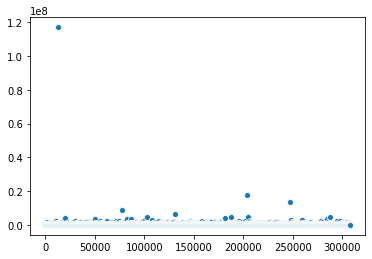

,AMT_INCOME_TOTAL
12840,117000000.0
203693,18000090.0
246858,13500000.0
77768,9000000.0
131127,6750000.0


In [8]:
import seaborn as sns
sns.scatterplot(app_train['AMT_INCOME_TOTAL'].index, app_train['AMT_INCOME_TOTAL'].values)
plt.show()

app_train[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False).head()

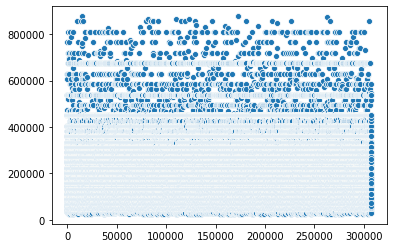

,AMT_INCOME_TOTAL
172909,877500.0
172302,877500.0
15358,877500.0
262361,876276.0
110459,864900.0


In [9]:
#去outlier觀察
app_train = app_train[np.abs(app_train['AMT_INCOME_TOTAL']-app_train['AMT_INCOME_TOTAL'].mean())\
                      <= (3*app_train['AMT_INCOME_TOTAL'].std())]

sns.scatterplot(app_train['AMT_INCOME_TOTAL'].index, app_train['AMT_INCOME_TOTAL'].values)
plt.show()
app_train[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False).head()

In [10]:
app_train['AMT_BINNED'] = pd.qcut(app_train['AMT_INCOME_TOTAL'],q=4)
app_train['AMT_BINNED'].value_counts()

(25649.999, 112500.0]    100578
(144000.0, 202500.0]      82340
(202500.0, 877500.0]      71084
(112500.0, 144000.0]      53055
Name: AMT_BINNED, dtype: int64

In [11]:
app_train.groupby('AMT_BINNED')[['AMT_INCOME_TOTAL','TARGET']].mean()

,AMT_INCOME_TOTAL,TARGET
AMT_BINNED,,
"(25649.999, 112500.0]",90272.744231,0.083945
"(112500.0, 144000.0]",132725.351781,0.085270
"(144000.0, 202500.0]",175574.402817,0.083981
"(202500.0, 877500.0]",289867.978482,0.069200
